- Installing Keras Tuner

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Logistic Regression , KNN , SVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt

# **Loading Data**

In [ ]:
# load data
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
### Information about features rows,memory usage and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
### Shape of the dataset having 32 columns and 569 rows
df.shape

(569, 32)

In [ ]:
### Statistical analysis of all columns containing mean , median , etc.
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [ ]:
# drop useless columns
df.drop(['id'], axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# **EDA**

### Univariate Analysis

In [ ]:
plt.rcParams['figure.max_open_warning'] = 31

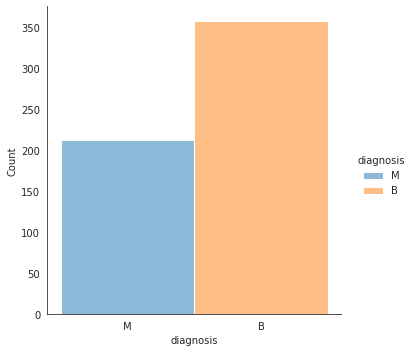

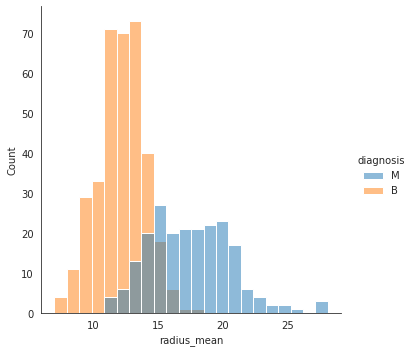

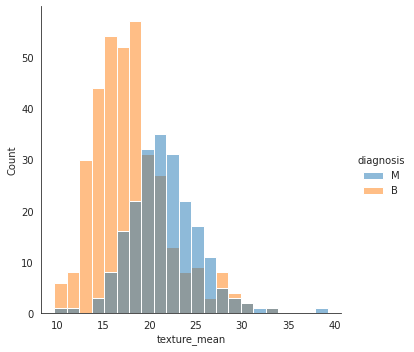

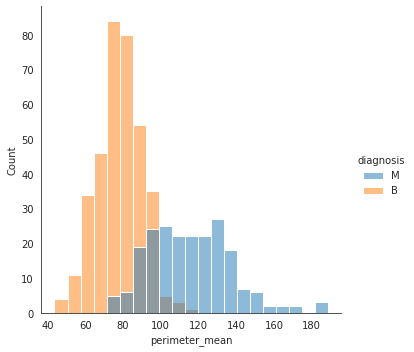

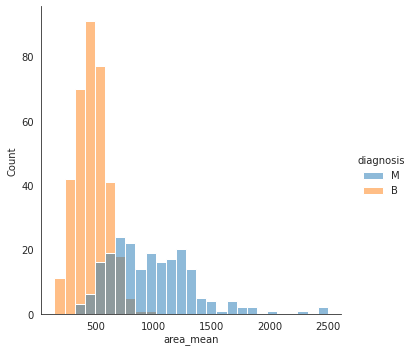

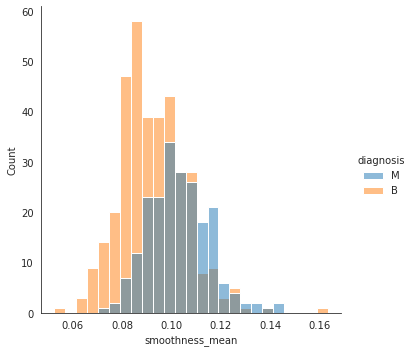

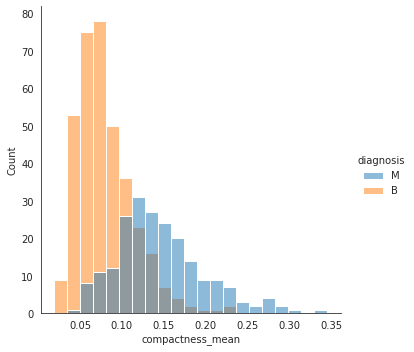

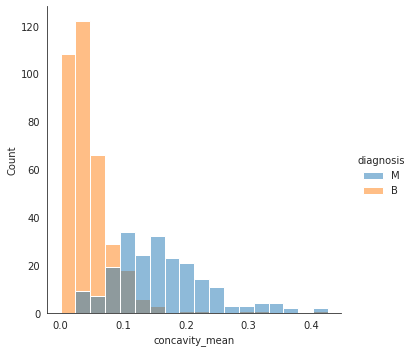

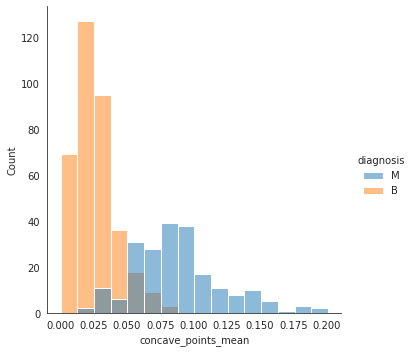

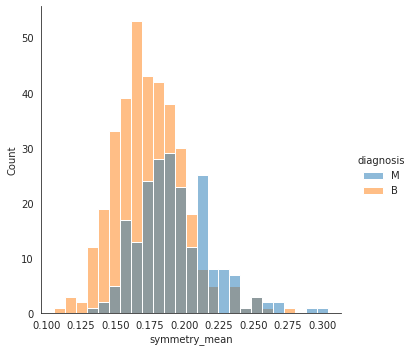

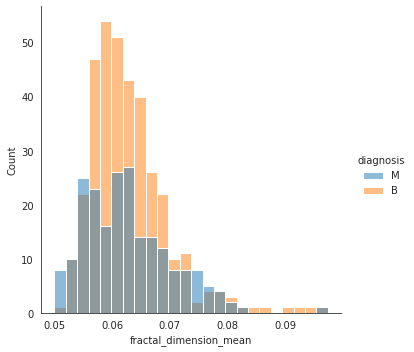

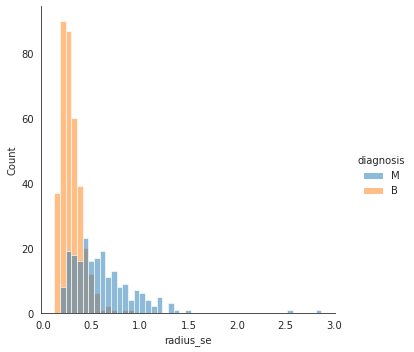

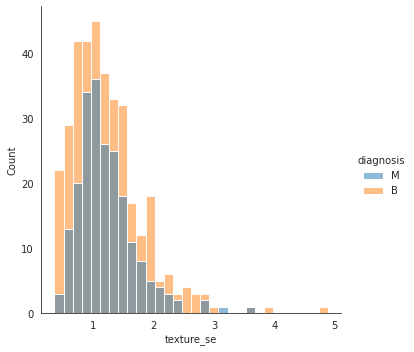

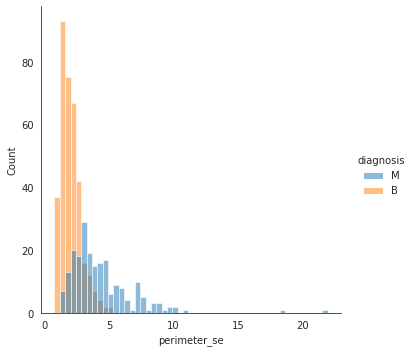

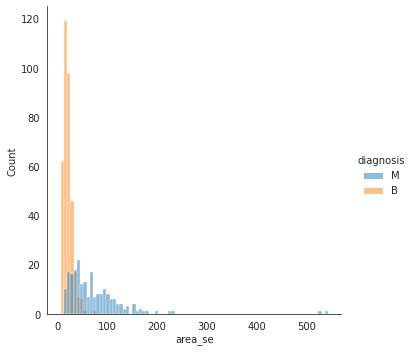

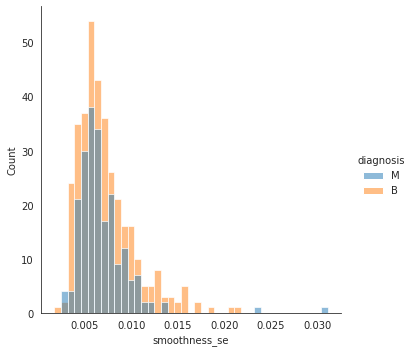

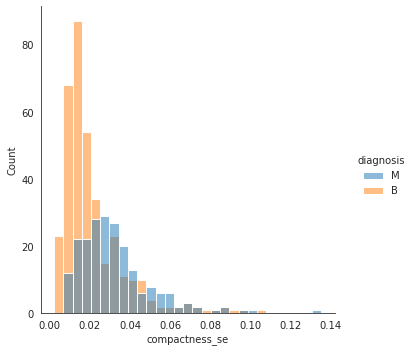

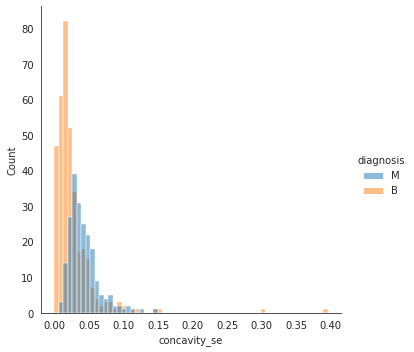

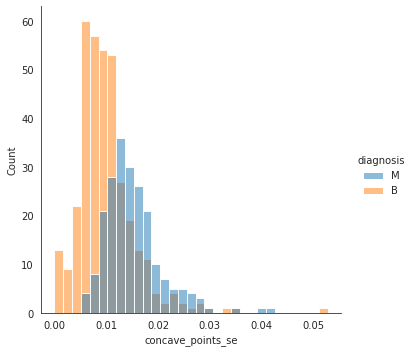

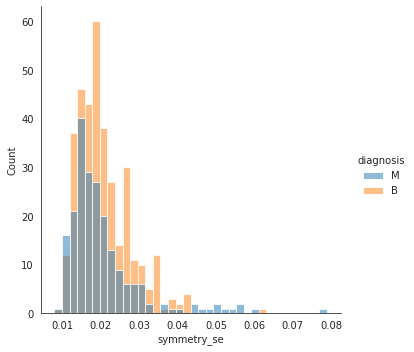

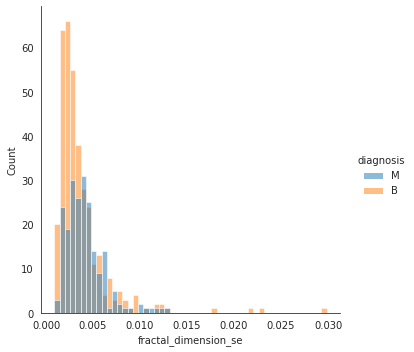

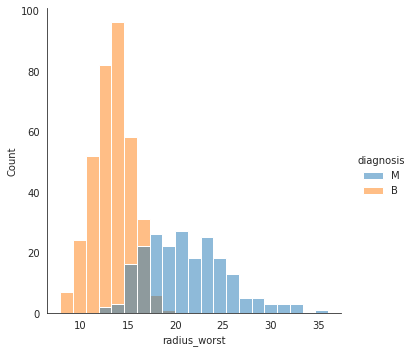

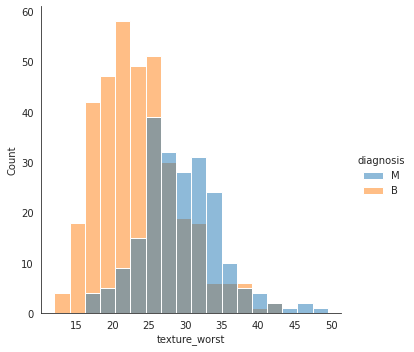

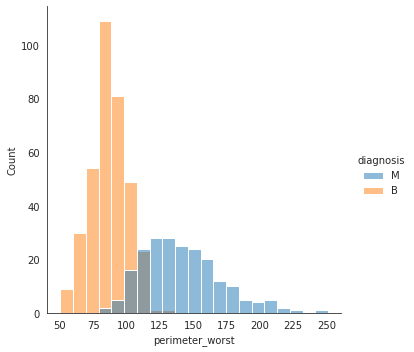

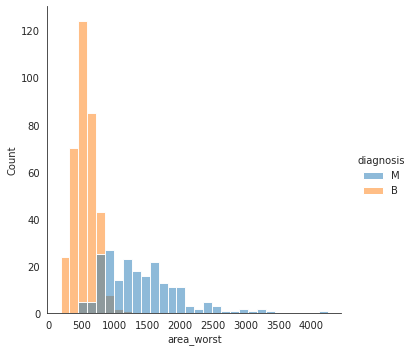

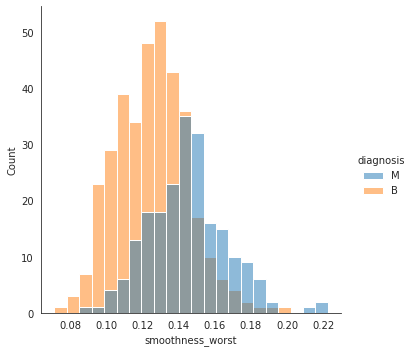

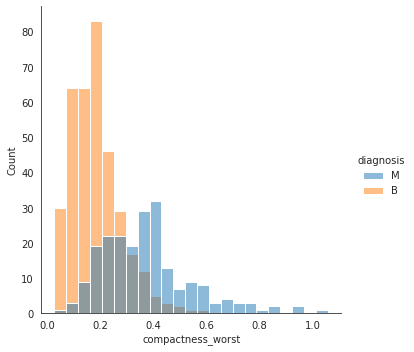

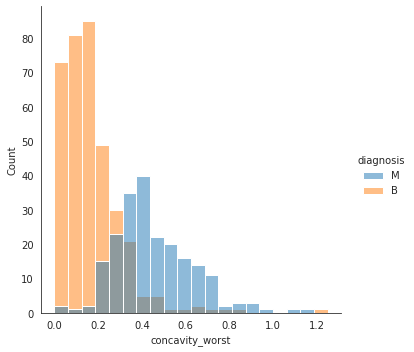

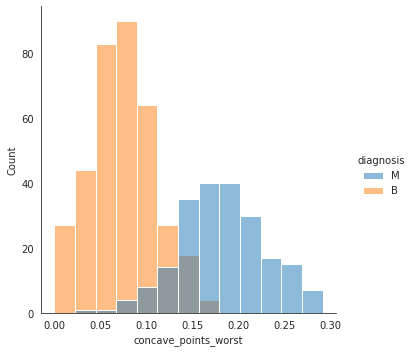

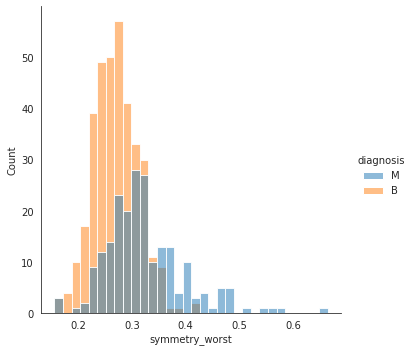

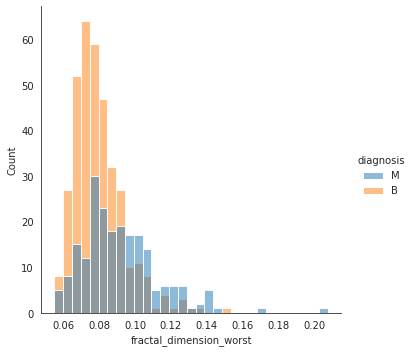

In [ ]:
for i in range(len(df.columns)):
  sns.displot(df,x=df.columns[i],hue='diagnosis')

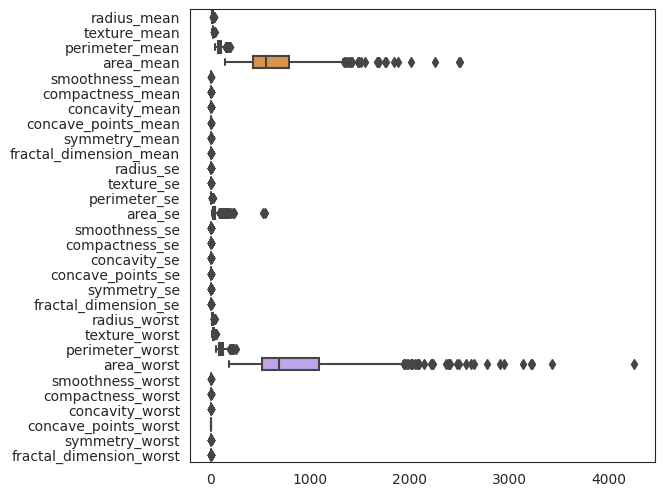

In [ ]:
### Boxplot checking outliers
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

### Bivariate Analysis

## Multivariate Analysis

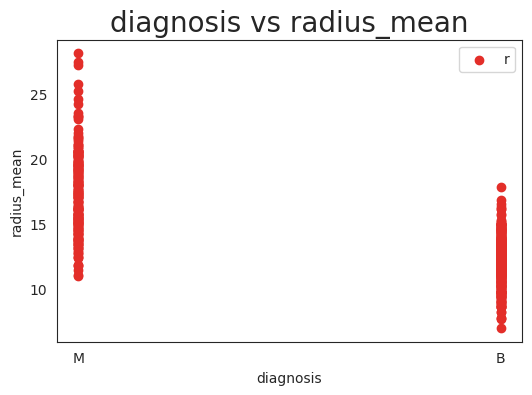

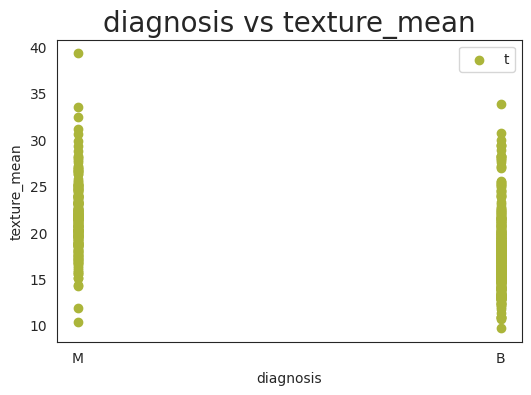

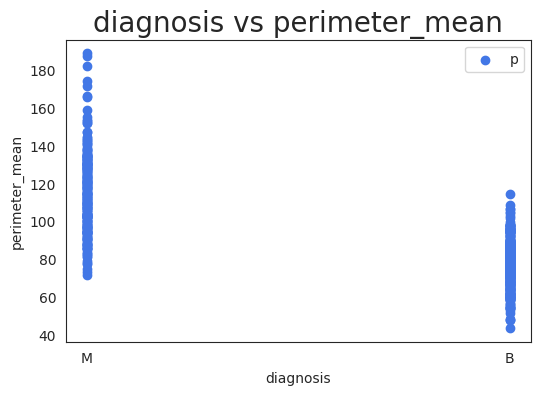

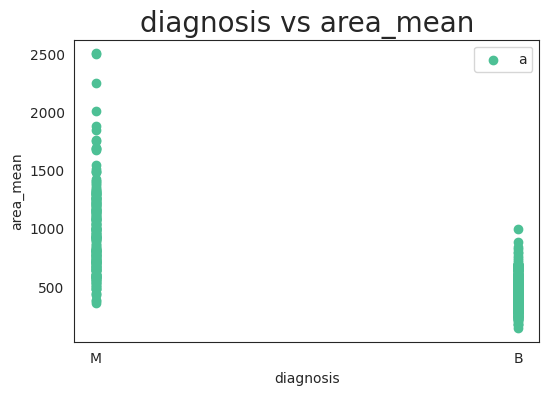

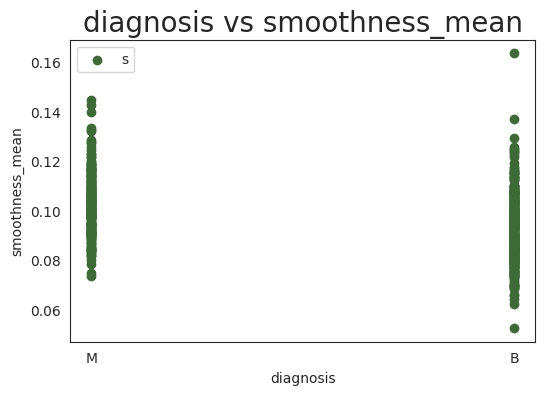

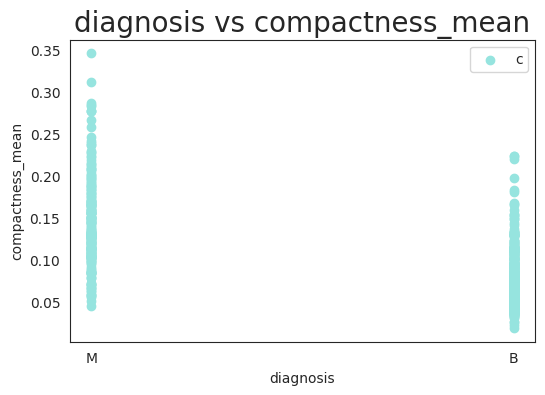

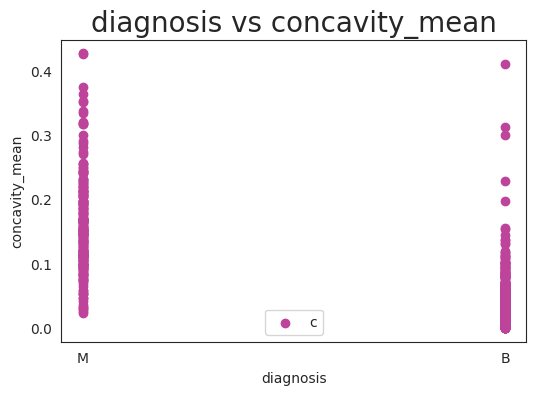

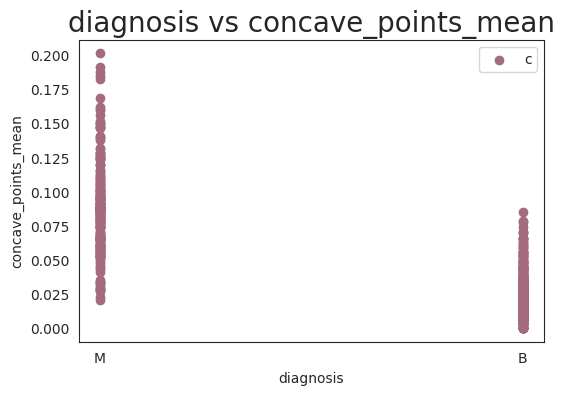

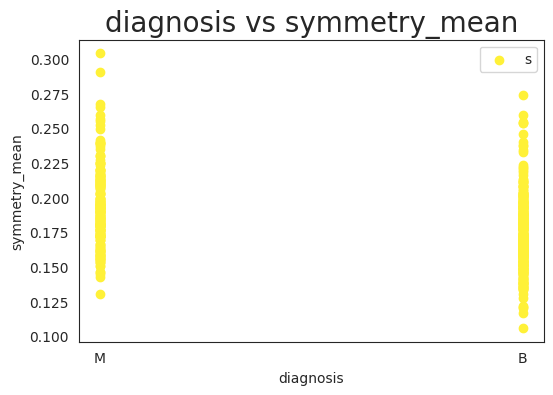

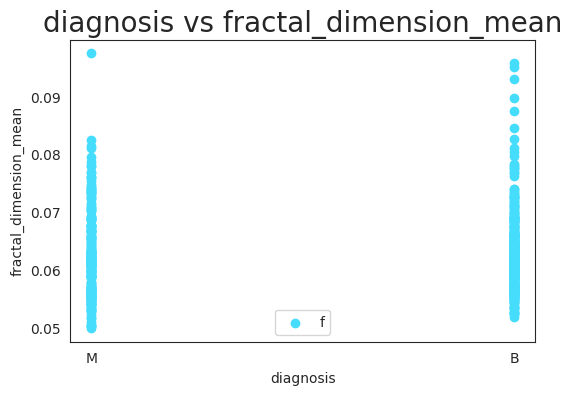

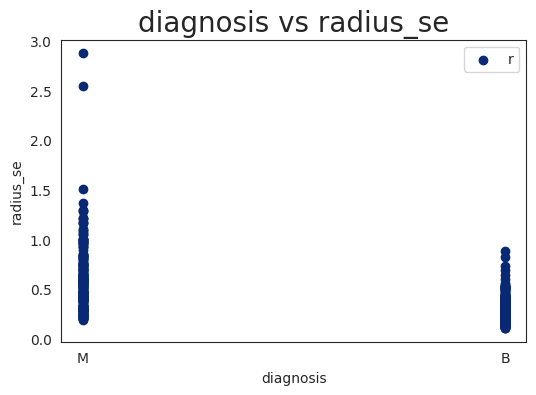

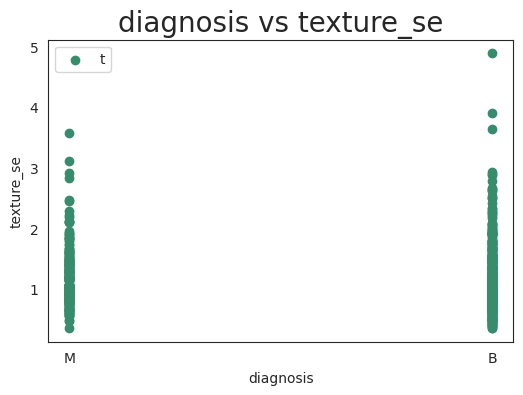

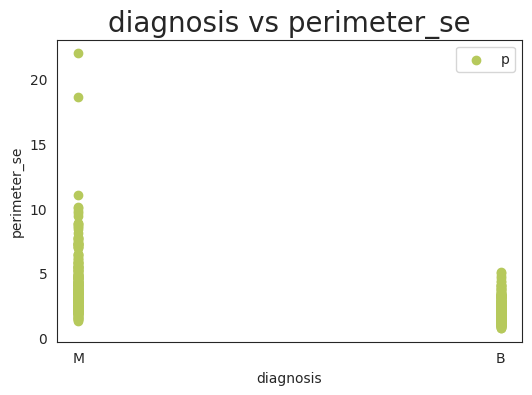

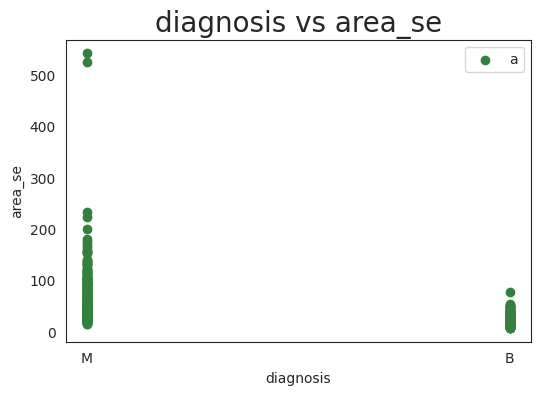

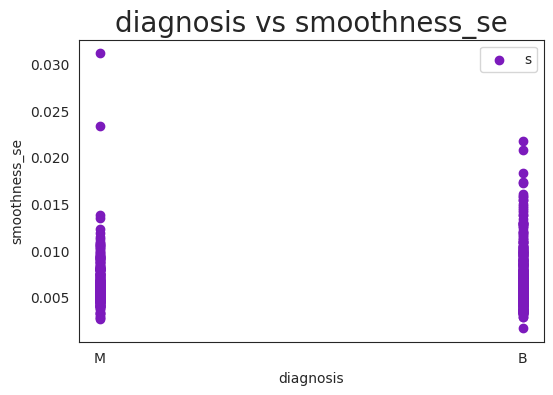

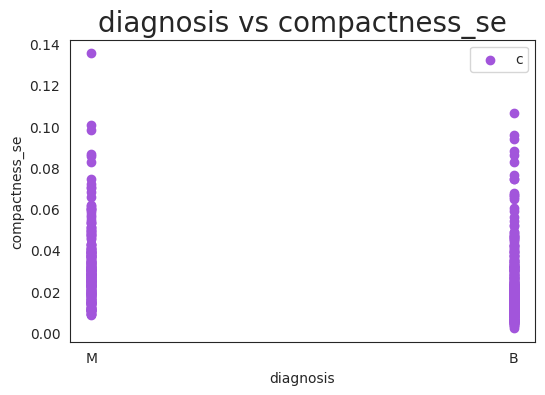

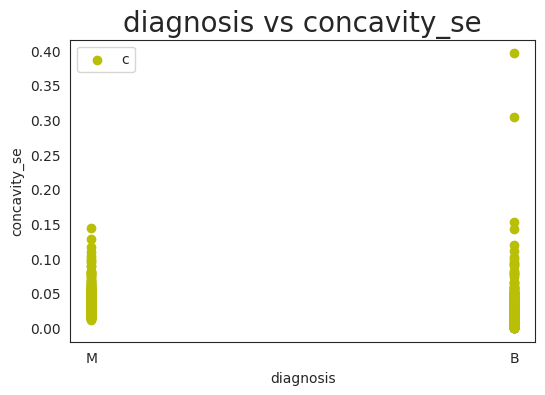

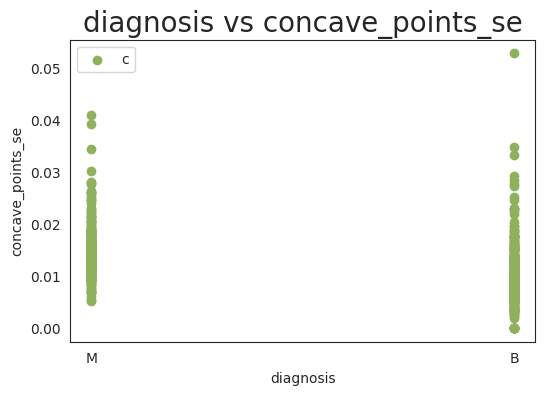

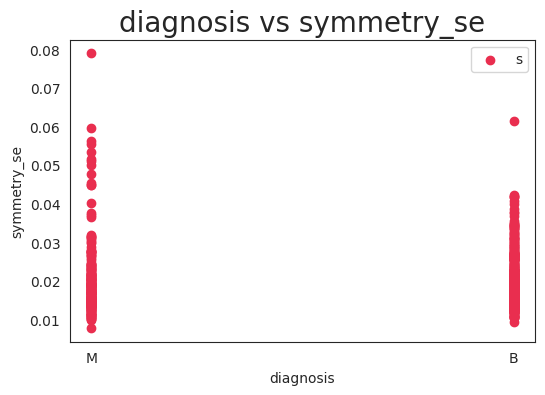

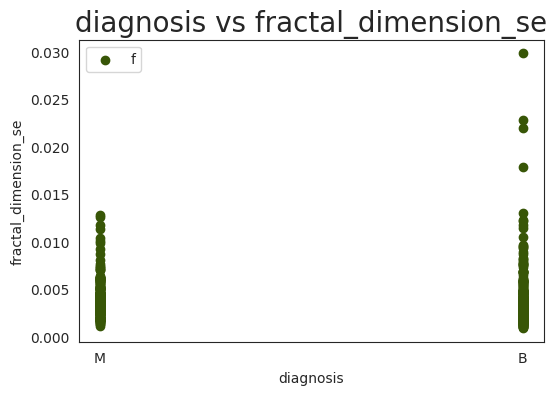

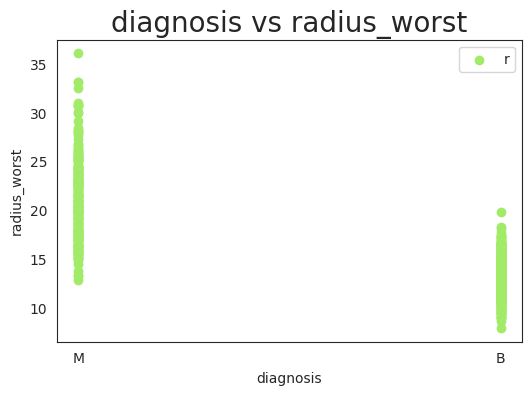

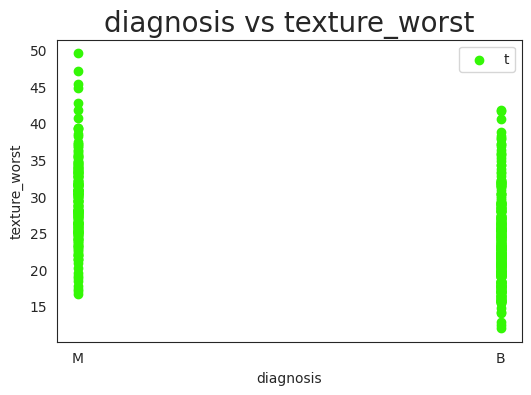

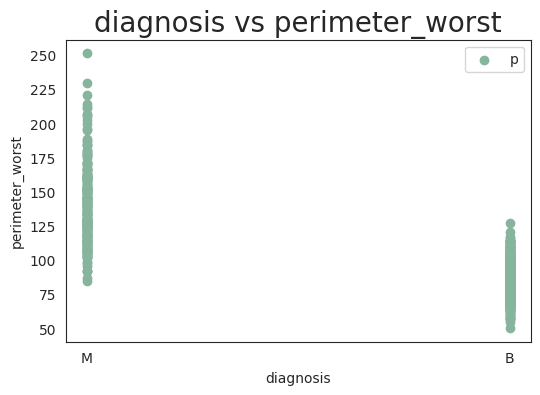

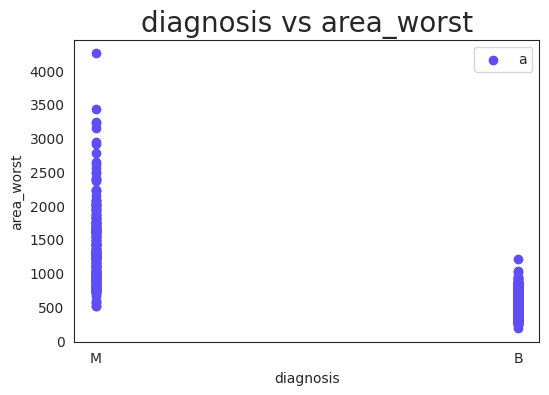

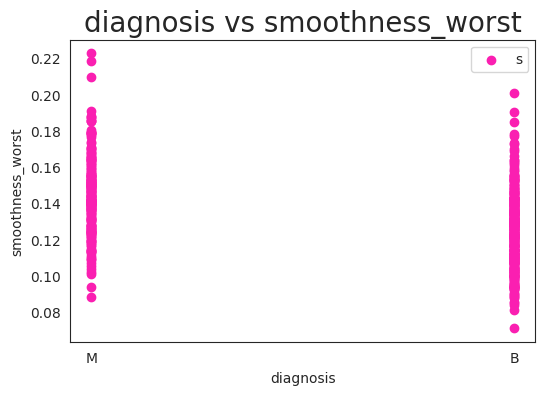

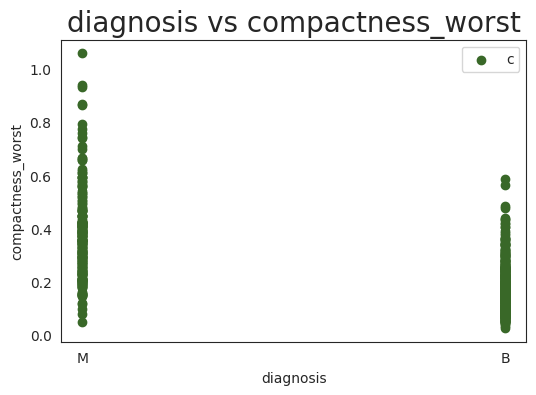

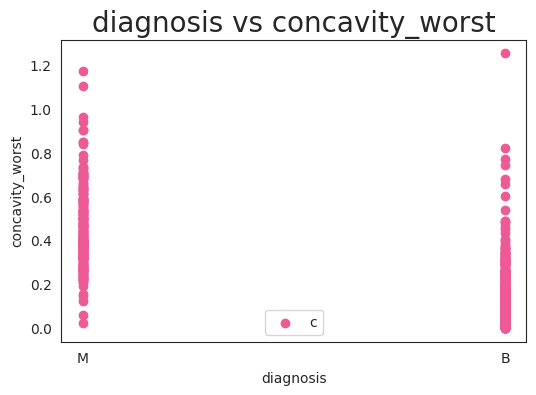

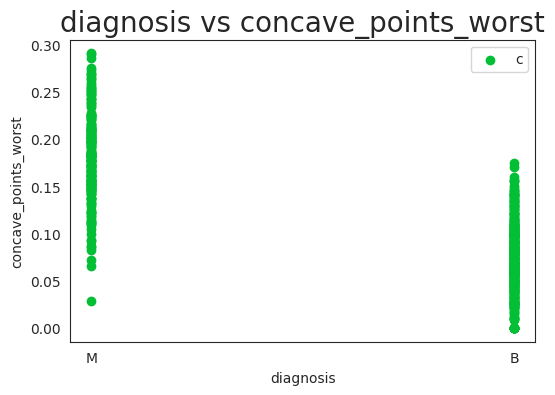

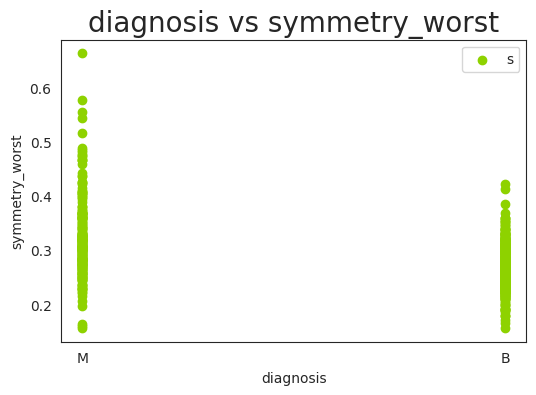

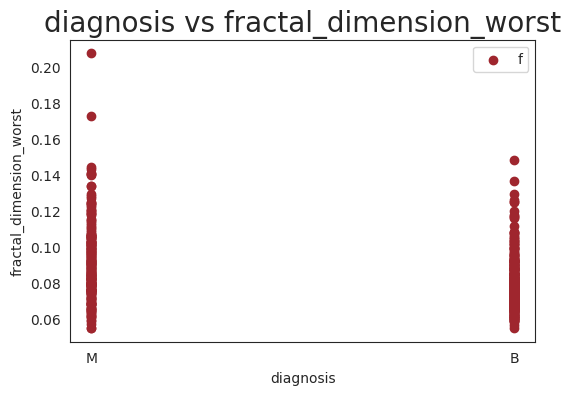

In [ ]:
x_col = 'diagnosis'
y_cols = list(df.drop('diagnosis',axis=1).columns)

for col in y_cols:
    figure = plt.figure(dpi=100)
    ax = plt.gca()
    rgb = np.random.rand(3,)
    ax.scatter(df[x_col], df[col],c=[rgb])
    ax.set_xlabel(x_col)
    ax.set_ylabel(col)
    ax.set_title("{} vs {}".format(x_col,col),fontdict={'fontsize':20})

    plt.legend(labels=col)
    plt.show()

- Correlation Heatmap

## **Handling Missing Values**

In [ ]:
### Checking missing values for all columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **Handling Categorical Variables**

In [ ]:
### This is infact numerical feature . That's why value counts are very high
print(df['radius_mean'].value_counts())

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64


In [ ]:
### Mapping target column to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
### Value counts of target column
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

## **Handling Numerical Variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


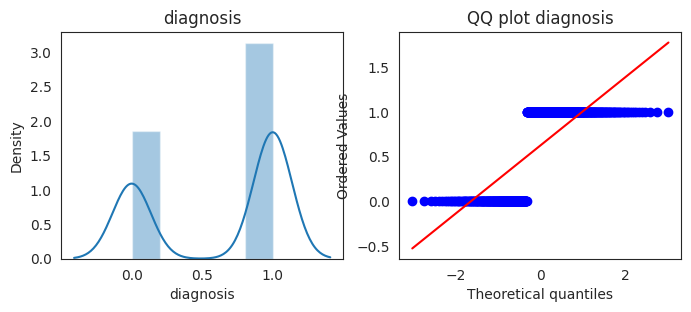

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


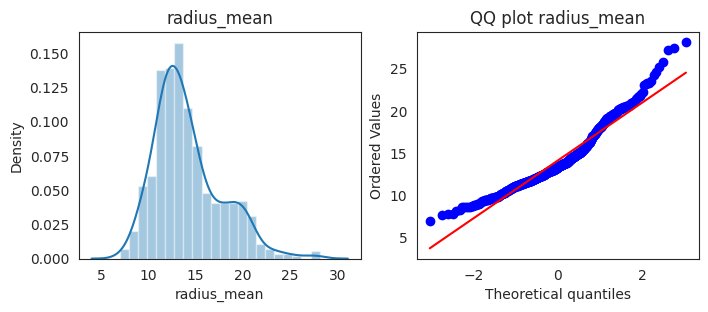

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


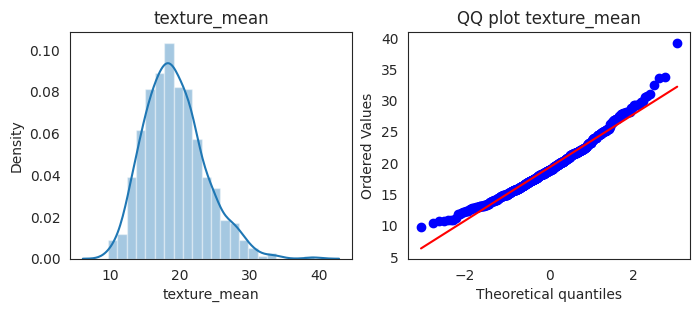

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


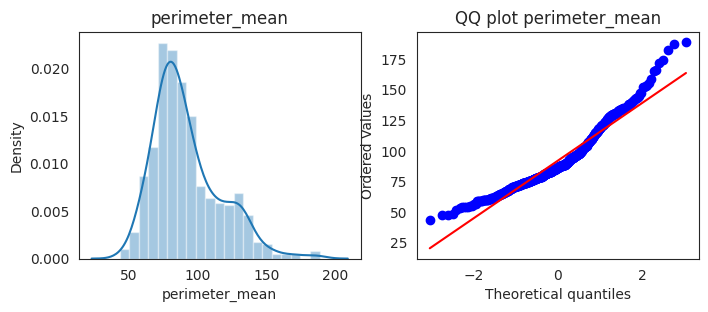

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


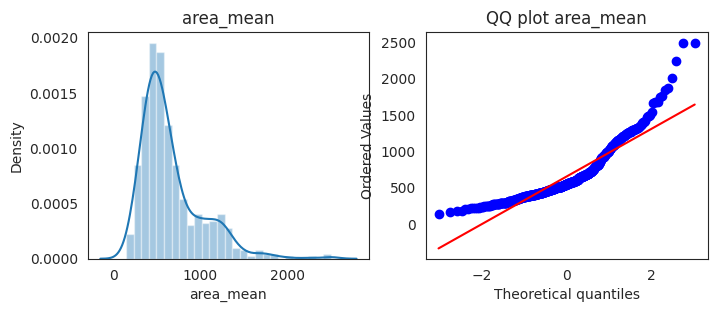

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


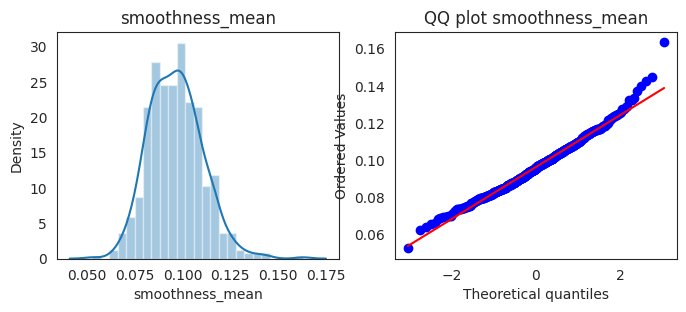

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


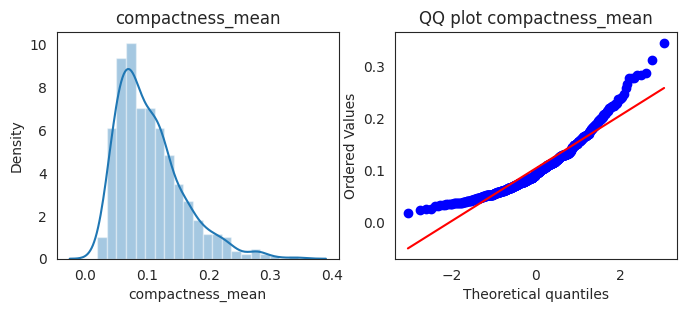

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


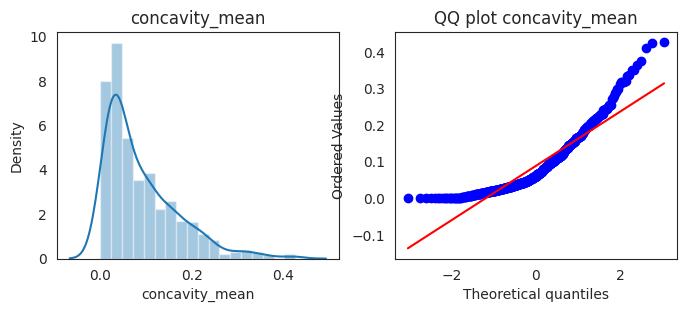

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


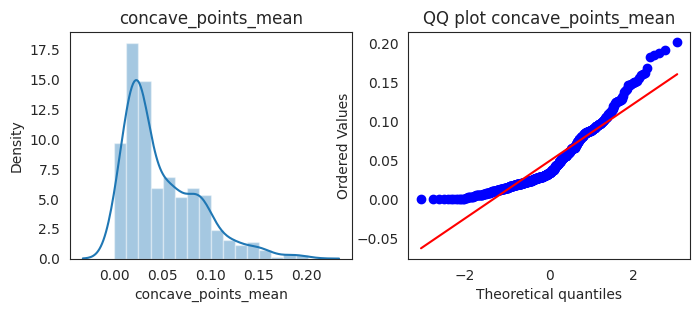

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


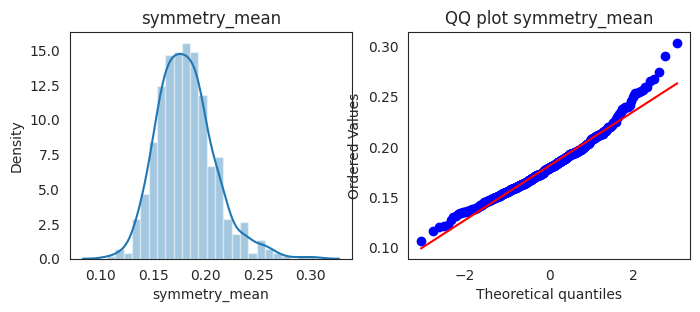

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


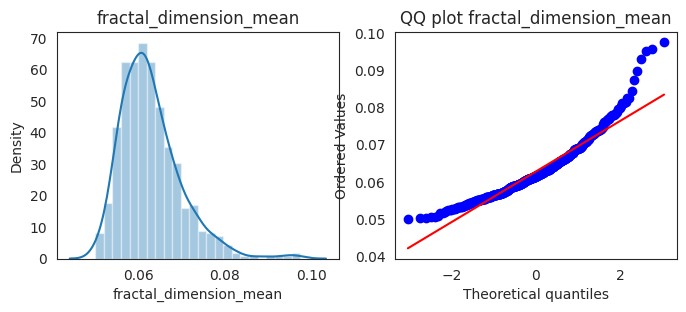

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


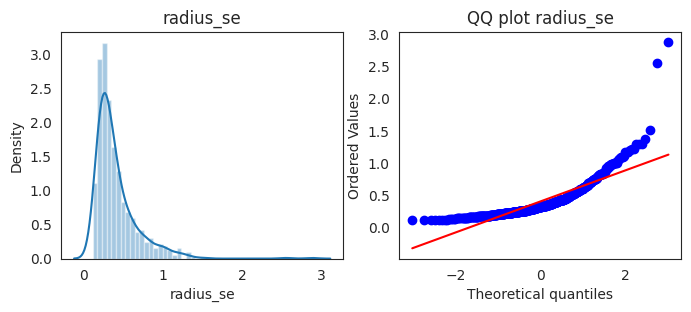

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


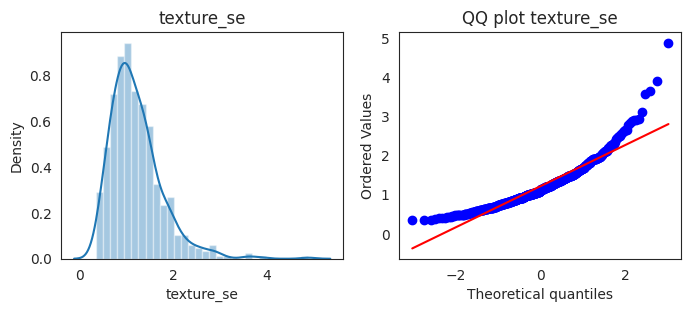

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


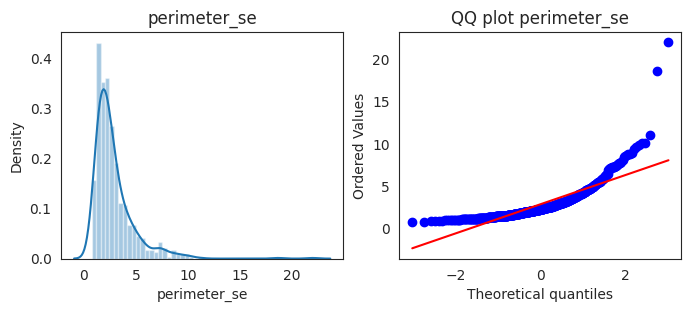

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


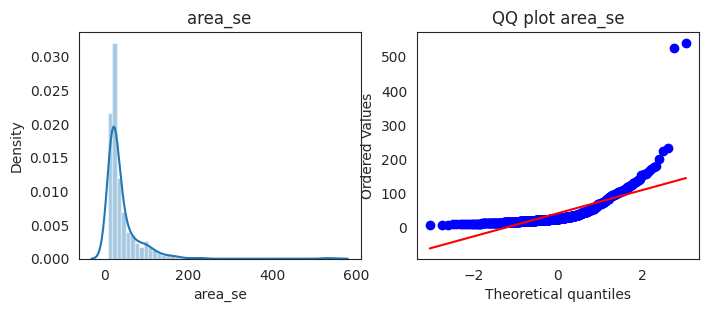

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


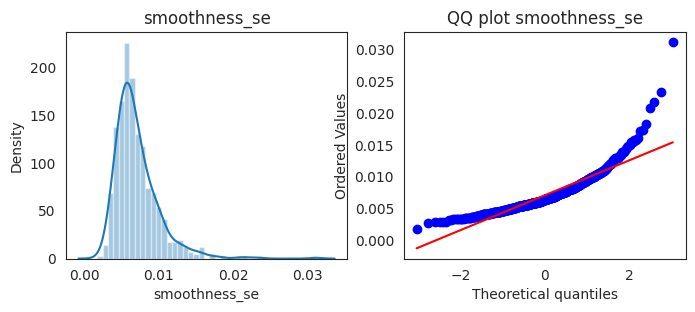

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


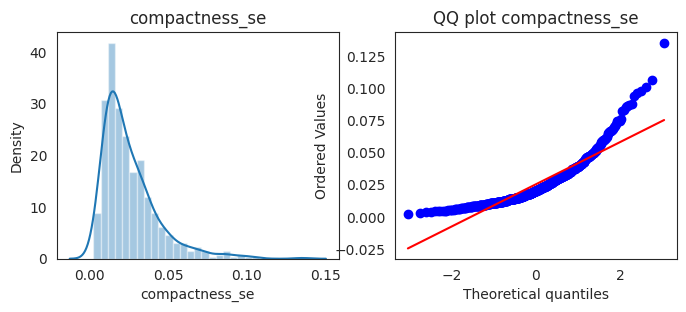

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


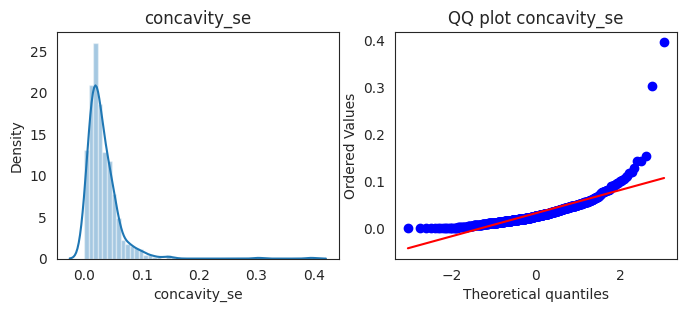

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


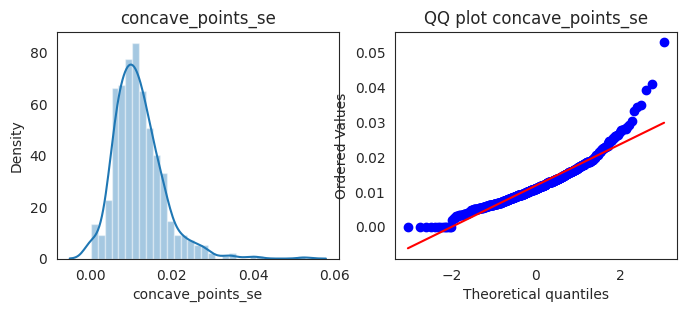

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


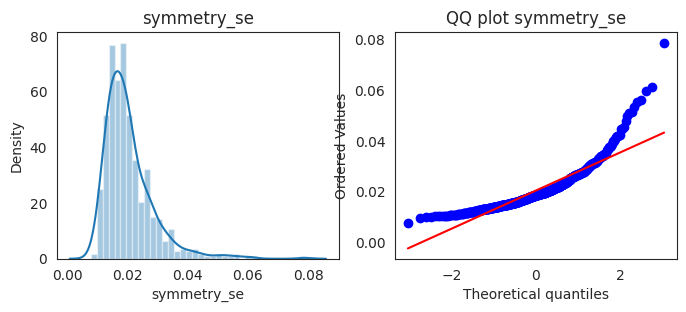

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


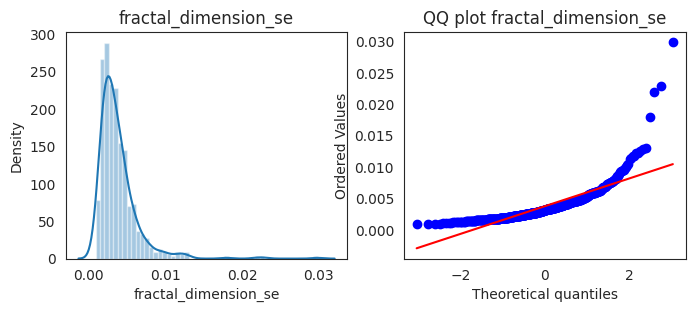

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


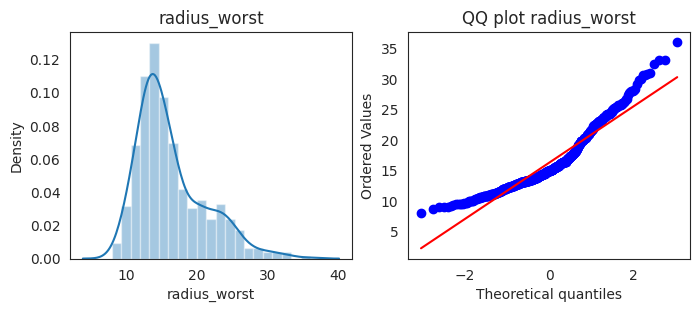

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


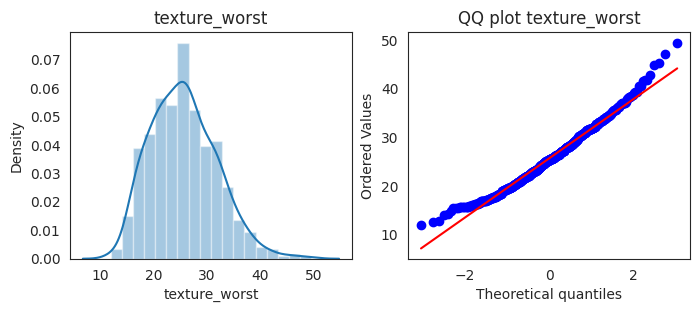

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


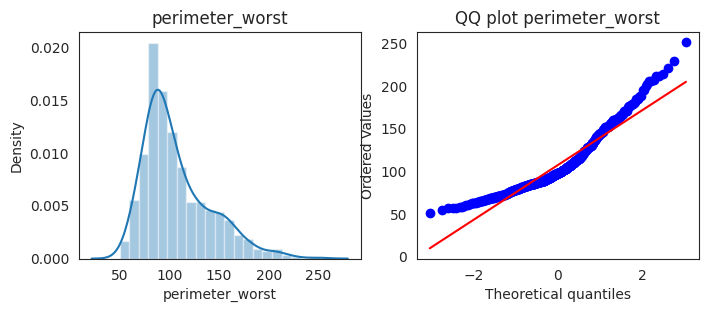

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


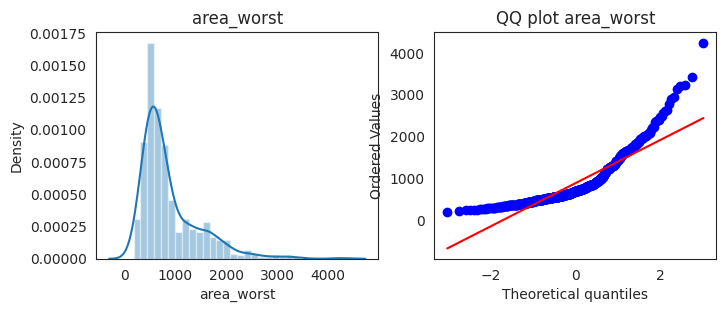

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


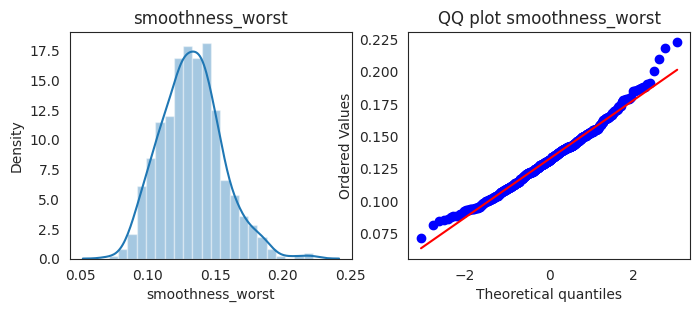

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


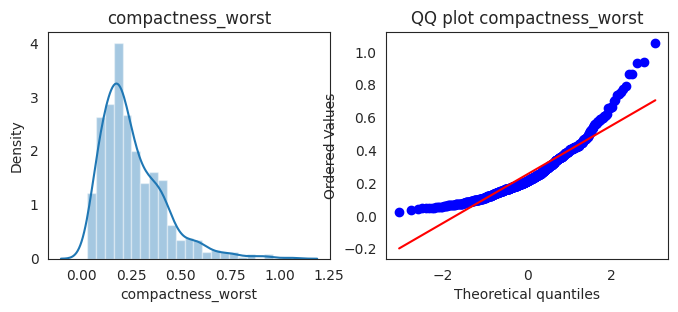

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


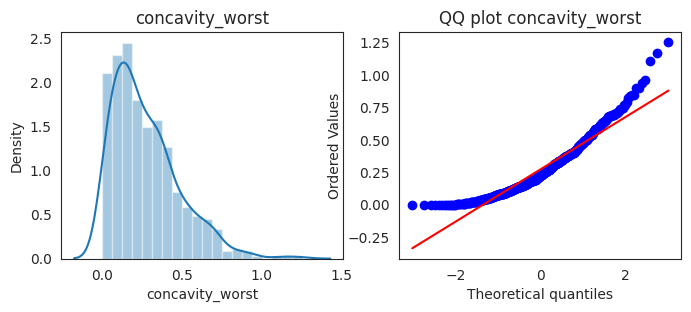

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


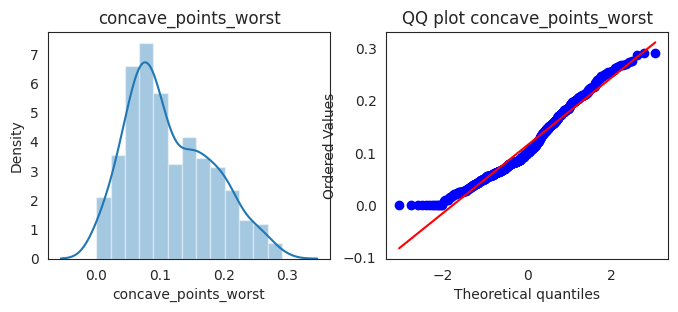

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


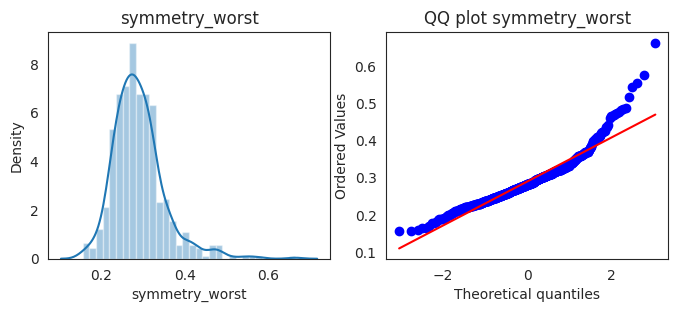

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


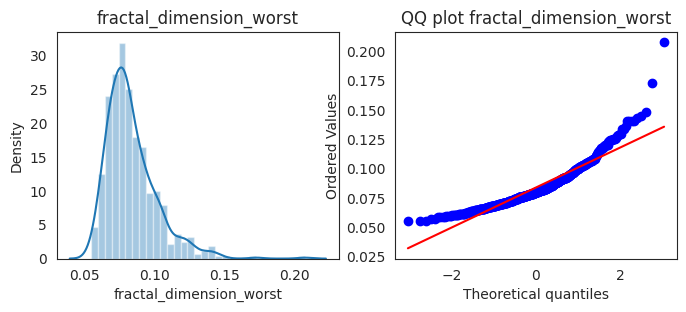

In [ ]:
### Plotting distribution graph and QQ-Plot
for i in range(len(df.columns)):
  plt.figure(figsize=(8,3),dpi=100)
  plt.subplot(121)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.subplot(122)
  stats.probplot(df[df.columns[i]], dist="norm", plot=plt)
  plt.title('QQ plot '+df.columns[i])

  plt.show()

### **Detecting Outliers and Removal using Z-score (Capping Method)**

In [ ]:
### Appending upper and lower limit for all columns
upper_limit = []
lower_limit = []
for i in range(len(df.columns)):
  upper_limit.append(df[df.columns[i]].mean() + 3*df[df.columns[i]].std())
  lower_limit.append(df[df.columns[i]].mean() - 3*df[df.columns[i]].std())

In [ ]:
### Replacing all limit values to their relative columns
for i in range(len(df.columns)):
  df[df.columns[i]] = np.where(
    df[df.columns[i]]>upper_limit[i],
    upper_limit[i],
    np.where(
        df[df.columns[i]]<lower_limit[i],
        lower_limit[i],
        df[df.columns[i]]
    )
)

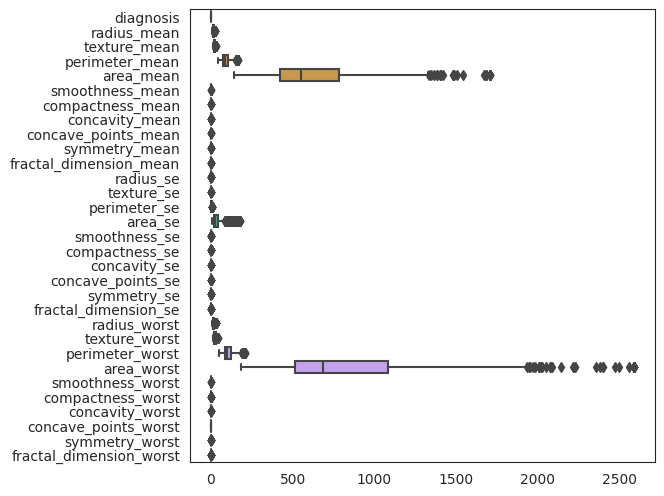

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

## **Splitting data into X and Y variables**

In [ ]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

## **Splitting X,Y into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

X_train.shape, X_test.shape

((426, 30), (143, 30))

## **Feature Scaling**

In [ ]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Mean of all columns
scaler.mean_

array([1.41352211e+01, 1.92253480e+01, 9.19541358e+01, 6.51837681e+02,
       9.63429716e-02, 1.03358276e-01, 8.80483759e-02, 4.88927427e-02,
       1.80337133e-01, 6.25354573e-02, 3.96848267e-01, 1.20421970e+00,
       2.78104064e+00, 3.87145952e+01, 6.93971158e-03, 2.48355956e-02,
       3.04966434e-02, 1.16312089e-02, 2.02649782e-02, 3.62406835e-03,
       1.62892924e+01, 2.56150657e+01, 1.07247660e+02, 8.76084242e+02,
       1.32390253e-01, 2.51083397e-01, 2.68155495e-01, 1.15279345e-01,
       2.88710723e-01, 8.32603242e-02])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0,...,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0,426.0
mean,14.1,19.2,92.0,651.8,0.1,0.1,0.1,0.0,0.2,0.1,...,16.3,25.6,107.2,876.1,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.1,23.8,334.7,0.0,0.0,0.1,0.0,0.0,0.0,...,4.8,6.0,33.2,541.4,0.0,0.1,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.2,75.5,421.1,0.1,0.1,0.0,0.0,0.2,0.1,...,13.1,21.3,84.4,516.8,0.1,0.1,0.1,0.1,0.2,0.1
50%,13.4,18.8,86.3,552.6,0.1,0.1,0.1,0.0,0.2,0.1,...,15.0,25.2,97.6,684.6,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.6,103.8,771.8,0.1,0.1,0.1,0.1,0.2,0.1,...,19.0,29.4,125.8,1087.0,0.1,0.3,0.4,0.2,0.3,0.1
max,24.7,32.2,164.9,1710.6,0.1,0.3,0.3,0.2,0.3,0.1,...,30.8,44.1,208.1,2588.7,0.2,0.7,0.9,0.3,0.5,0.1


## **Feature Selection**

In [ ]:
## Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [ ]:
### Extracting selected features from feature selection function get_support()
sel_features = X_train.columns[sel.get_support()]

In [ ]:
### Feature importances by features
sel.estimator_.feature_importances_

array([0.02515433, 0.01563844, 0.05372655, 0.04861644, 0.00769078,
       0.00936994, 0.05539489, 0.10314262, 0.0065771 , 0.00282708,
       0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
       0.0041069 , 0.00401516, 0.00666662, 0.00468362, 0.00627095,
       0.11657269, 0.01628485, 0.1602104 , 0.06381792, 0.01356448,
       0.01164113, 0.03905697, 0.11719077, 0.01164259, 0.00960721])

In [ ]:
### Transforming original features into selected features
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

## **Model Building**

## KNearestNeighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_rfc,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_rfc)

- Heatmap of Confusion Matrix

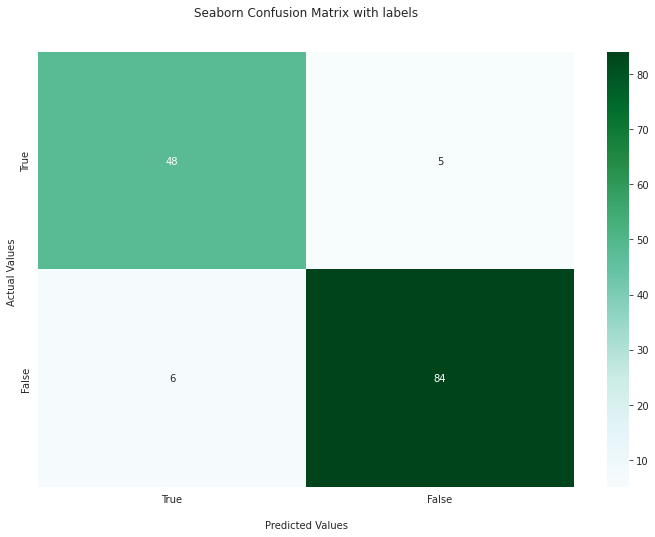

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of KNN Model

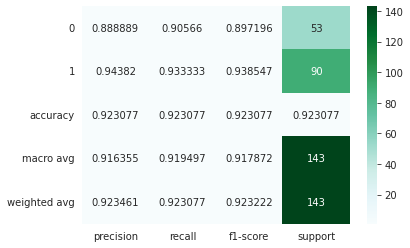

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')

## Support Vector Machines

In [ ]:
# an initial SVM model with linear kernel   
svm_linear = SVC(kernel='linear')

# fit
svm_linear.fit(X_train_rfc, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(X_test_rfc)

- Heatmap of Confusion Matrix

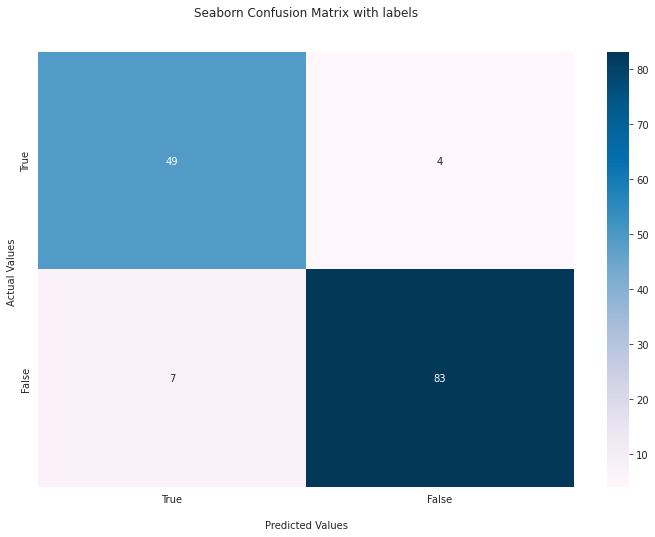

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of SVM Model

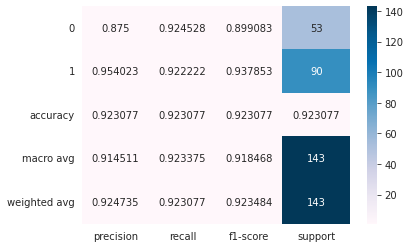

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

## Random Forest 

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_rfc,y_train)

RandomForestClassifier()

In [ ]:
y_pred = RF.predict(X_test_rfc)

- Heatmap of Confusion Matrix

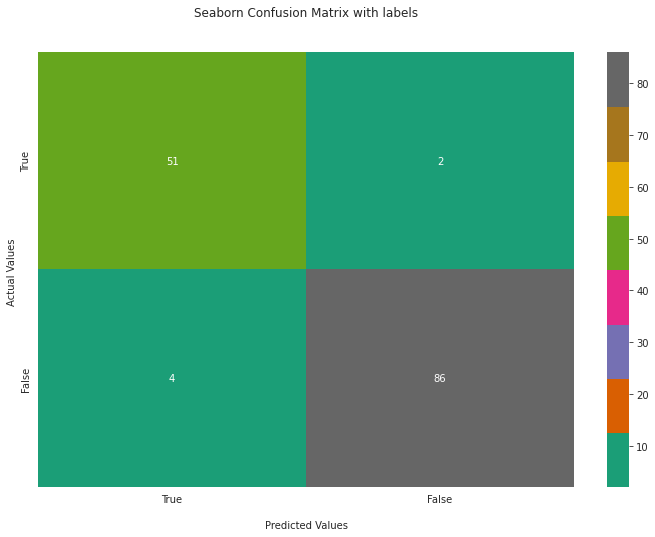

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Classification Report of Random Forest

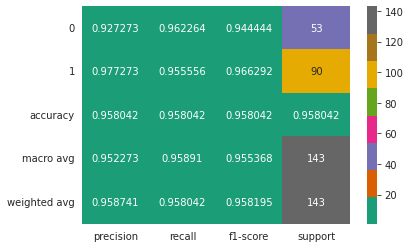

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='Dark2', fmt='g')

# Deep Neural Network

In [ ]:
# Initializing the sequential DNN model
model = Sequential()
# Adding a Dense layer having 256 neurons with input dimensions of 30 using relu activation function
model.add(Dense(256, activation = 'relu', input_dim = X_train_rfc.shape[1]))

# Adding a Dense layer having 128 neurons 
model.add(Dense(128, activation = 'relu'))

# Adding a fully connected layer having 64 neurons 
model.add(Dense(64, activation="relu"))

# Adding a fully connected layer having 32 neurons 
model.add(Dense(32, activation="relu"))

# Adding an O/p layer with 3 neurons having softmax activation function
model.add(Dense(1, activation="sigmoid"))

# Checking the model summary, its parameters and input and output
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2816      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# setup the parameters
# Applying the optimizer adam , its performing best using loss function sparse categorical crossentropy
model.compile(loss='BinaryCrossentropy', optimizer="adam", metrics=["accuracy"])

# training with 100 epochs and validating on validation set
history = model.fit(X_train_rfc, y_train, epochs=100, validation_data=(X_test_rfc, y_test))

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 6.5148 - accuracy: 0.4906 - val_loss: 1.7718 - val_accuracy: 0.6923
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0634 - accuracy: 0.7394 - val_loss: 0.3984 - val_accuracy: 0.9161
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8991 - val_loss: 0.2855 - val_accuracy: 0.9091
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8920 - val_loss: 1.1630 - val_accuracy: 0.8462
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5691 - accuracy: 0.8310 - val_loss: 0.6493 - val_accuracy: 0.8951
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.8850 - val_loss: 0.6283 - val_accuracy: 0.8042
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.9014 - val_loss: 0.5658 - val_accuracy: 0.8182
Epoch 8/100


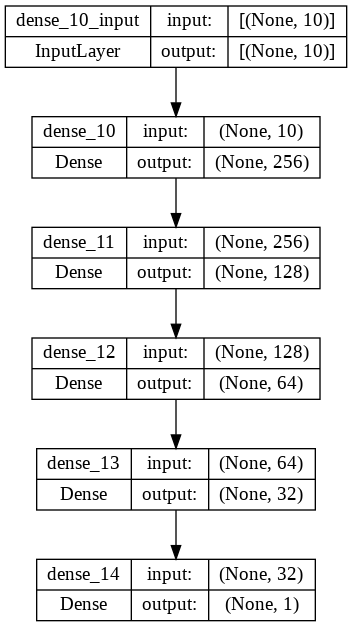

In [ ]:
# display model structure
keras.utils.plot_model(model, 'DNN_Model.png', show_shapes=True)

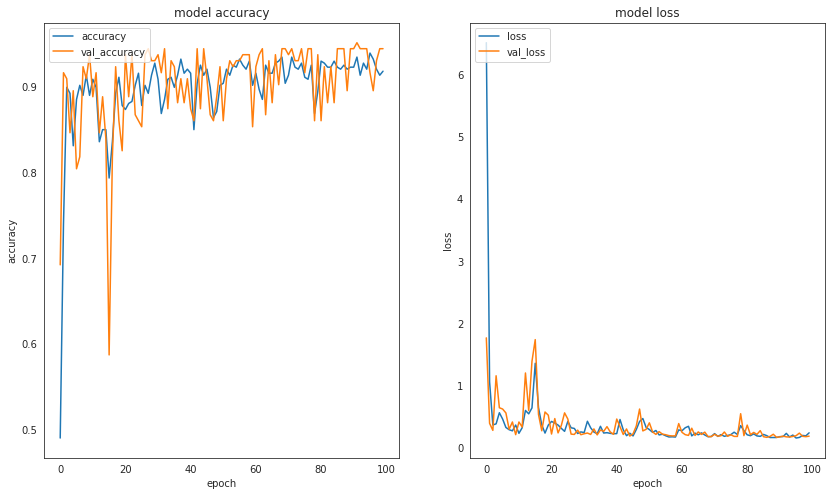

In [ ]:
def history_plot(history):
    plt.figure(figsize=(14,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.savefig('DNN.png',format='png')
    plt.show()

### History plotting for the model accuracy and loss based on epochs     
history_plot(history)

In [ ]:
y_pred = model.predict(X_test_rfc)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

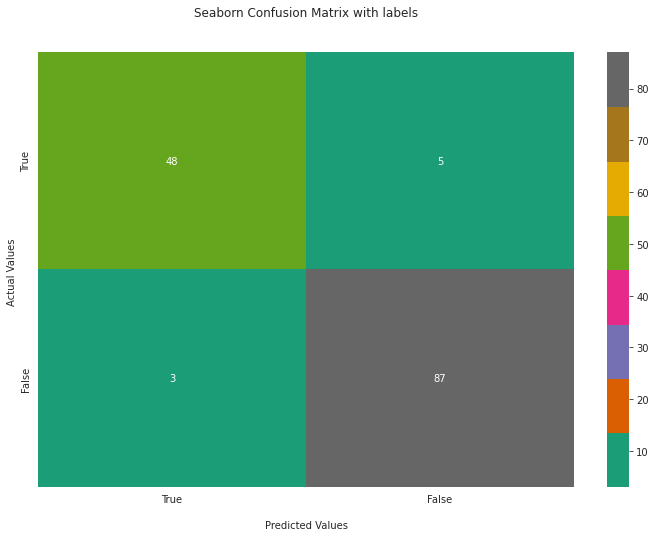

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

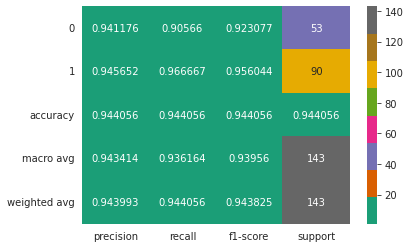

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='Dark2', fmt='g')

## **Hyper-Paremeter Tuning of Models**

- Hyper-Parameter Tuning with KNN

In [ ]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_rfc,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_rfc,y_train,cv=10)
    error_rate.append(1-score.mean())

[0.9084717607973423, 0.9225359911406423, 0.9109634551495016, 0.9249169435215947, 0.9224806201550388, 0.9272425249169436, 0.929623477297896, 0.9319490586932447, 0.9272425249169436, 0.9295681063122924, 0.9248615725359912, 0.9295681063122924, 0.9248615725359912, 0.9272425249169436, 0.9248615725359912, 0.9272425249169436, 0.9225359911406423, 0.9248615725359912, 0.9248615725359912, 0.9248615725359912, 0.9177740863787376, 0.92015503875969, 0.9155038759689923, 0.9155038759689923, 0.9154485049833887, 0.9130675526024363, 0.9130675526024363, 0.9130675526024363, 0.9084163898117387, 0.910797342192691, 0.910797342192691, 0.9131229235880399, 0.910797342192691, 0.910797342192691, 0.9084717607973423, 0.9084717607973423, 0.9108527131782946, 0.9108527131782946, 0.9131782945736434]


Text(0, 0.5, 'Error Rate')

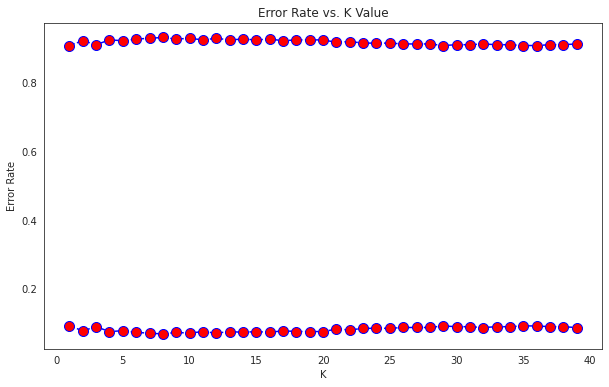

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
best_knn.fit(X_train_rfc,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
y_pred=best_knn.predict(X_test_rfc)

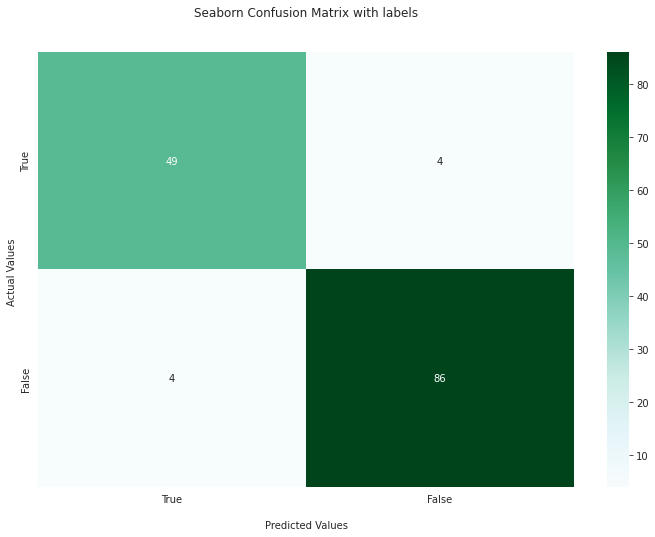

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

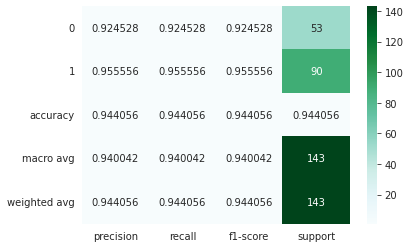

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')

Hyper-Parameter Tuning with SVM

In [ ]:
parameters = {'C':[1,10,100], 
             'gamma': [1e-2, 1e-3, 1e-4],
              'kernel': ['linear','rbf']}

# instantiate a model 
svc_grid_search = SVC()

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)

# fit
clf.fit(X_train_rfc, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.622326,1.293581,0.000996,0.000191,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.953488,0.941176,...,0.945992,0.021857,4,0.955882,0.953079,0.964809,0.953079,0.950147,0.955399,0.005043
1,0.010966,0.000475,0.003216,0.000063,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.651163,0.658824,...,0.640821,0.014615,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.609271,1.310087,0.001003,0.000193,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.953488,0.941176,...,0.945992,0.021857,4,0.955882,0.953079,0.964809,0.953079,0.950147,0.955399,0.005043
3,0.009064,0.000256,0.002530,0.000092,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.988372,0.894118,...,0.920027,0.035269,13,0.970588,0.991202,0.976540,0.967742,0.973607,0.975936,0.008180
4,1.601639,1.286430,0.000968,0.000146,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.953488,0.941176,...,0.945992,0.021857,4,0.955882,0.953079,0.964809,0.953079,0.950147,0.955399,0.005043


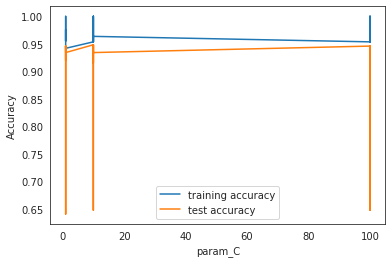

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_C"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_C"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

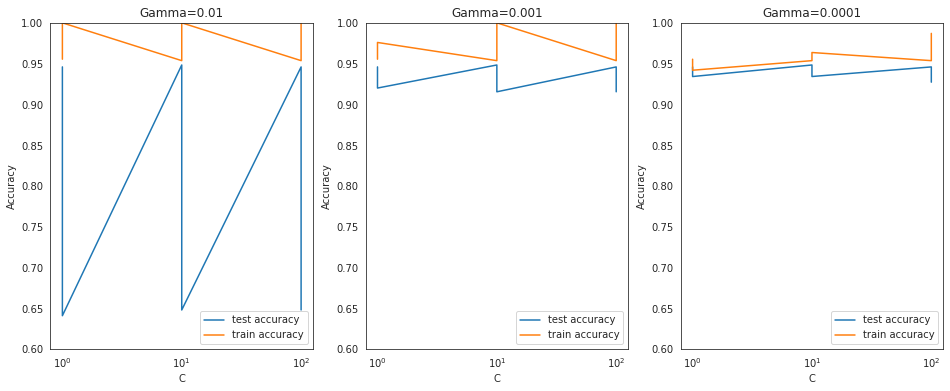

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [ ]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
best_SVM = SVC(C=10,gamma=0.01,kernel='linear')
best_SVM.fit(X_train_rfc,y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [ ]:
y_pred = best_SVM.predict(X_test_rfc)

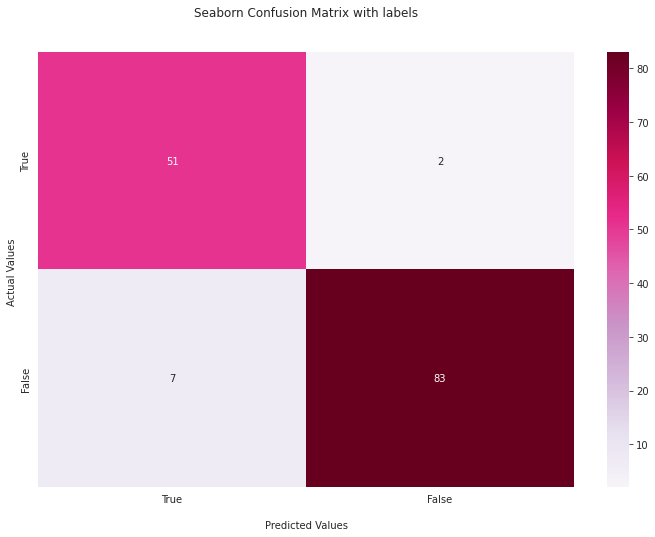

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

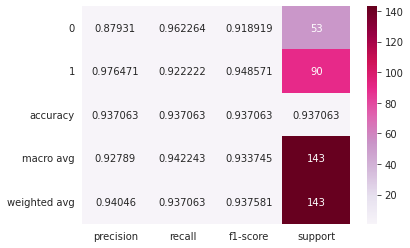

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')

- Hyper-Parameter Tuning with Random Forest

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy',return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_rfc, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6267605633802817 using {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
best_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100)

In [ ]:
# fit
best_rfc.fit(X_train_rfc,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=200)

In [ ]:
y_pred = best_rfc.predict(X_test_rfc)

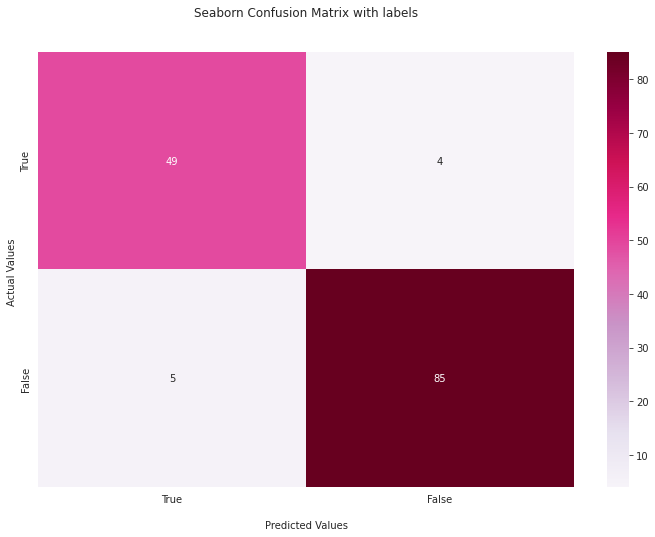

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

- Hyperparameter Tuning with DNN

In [ ]:
### Building hyper tuned model

def build_model(hp):
  model1 = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  hp_units4 = hp.Int('units4', min_value=32, max_value=512, step=32)

  model1.add(Dense(units=hp_units1, activation='relu',input_dim=X_train_rfc.shape[1]))

  model1.add(Dense(units=hp_units2, activation='relu'))

  model1.add(Dense(units=hp_units4, activation='relu'))
  
  model1.add(keras.layers.Dropout(0.5))

  model1.add(Dense(units=hp_units3, activation='relu'))

  model1.add(Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_optimizer = hp.Choice('optimizer',values = ['adam','sgd','adagrad','rmsprop'])

  model1.compile(
      optimizer=hp_optimizer,
      loss=['BinaryCrossentropy'],
      metrics=['accuracy']
  )

  return model

In [ ]:
# HyperBand algorithm from keras tuner
# Objective is to maximize validation accuracy 
tuner1 = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_accuracy','max'),
    max_epochs=100,
)

In [ ]:
### Fitting above settings on model
tuner1.search(X_train_rfc, y_train, epochs=100,validation_data=(X_test_rfc,y_test))

Trial 254 Complete [00h 00m 11s]
val_accuracy: 0.9720279574394226

Best val_accuracy So Far: 0.9790209531784058
Total elapsed time: 00h 08m 19s


In [ ]:
tuner1.get_best_models(1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps= tuner1.get_best_hyperparameters(1)[0]

# get the best model
best_model = tuner1.get_best_models(1)[0]

In [ ]:
# Build the model with the optimal hyperparameters
# train the model.
best_DNN = tuner1.hypermodel.build(best_hps)
history_opt = model1.fit(X_train_rfc, y_train, 
          validation_data= (X_test_rfc,y_test), 
          epochs= 100)

Epoch 1/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9648 - val_loss: 0.1072 - val_accuracy: 0.9441
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0921 - accuracy: 0.9648 - val_loss: 0.2422 - val_accuracy: 0.9441
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.9789 - val_loss: 0.2021 - val_accuracy: 0.9371
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9742 - val_loss: 0.1546 - val_accuracy: 0.9650
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9601 - val_loss: 0.4352 - val_accuracy: 0.9231
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9695 - val_loss: 0.3990 - val_accuracy: 0.9441
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9718 - val_loss: 0.2323 - val_accuracy: 0.9441
Epoch 8/100
1

In [ ]:
y_pred = best_DNN.predict(X_test_rfc)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

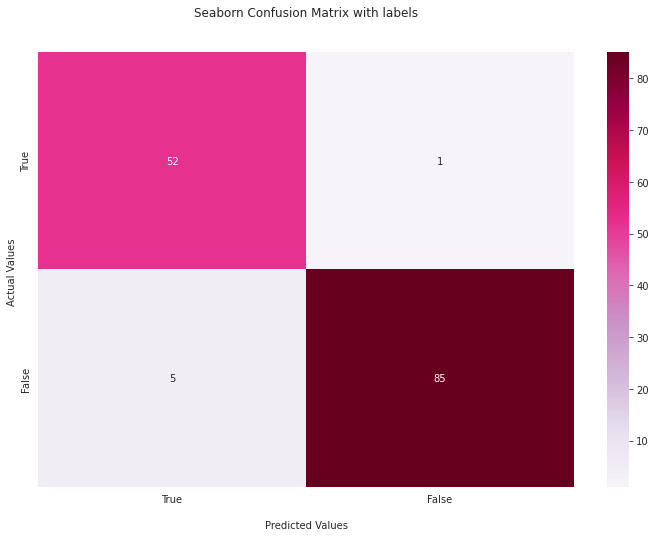

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
best_DNN.evaluate(X_test_rfc,y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9580


0.9580419659614563

In [ ]:
model_ls = []
for model in [best_SVM,best_rfc,best_knn,best_DNN]:
  if model == best_DNN:
    model_ls.append(best_DNN.evaluate(X_test_rfc,y_test)[1])
  else:
    model_ls.append(model.score(X_test_rfc,y_test))
model_score = pd.DataFrame(model_ls,columns=['Accuracy'],index= ['Tuned_SVM','Tuned_RandomForest','Tuned_KNN','Tuned_DNN'])

5/5 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9580


In [ ]:
model_score

,Accuracy
Tuned_SVM,0.937063
Tuned_RandomForest,0.937063
Tuned_KNN,0.944056
Tuned_DNN,0.958042
